In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['axes.labelpad'] = 15
plt.rcParams.update({'font.size': 12})

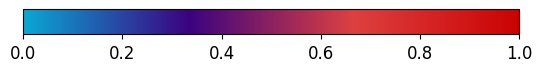

In [79]:
# Define the colors
start_color = "#0AA7D4"
middle_color = "#3B0280"
end_color = "#DD4040"
end_end_color = "#CB0202"

num_colors = 10

# Create the gradient list of colors
gradient = mcolors.LinearSegmentedColormap.from_list("custom_gradient", [start_color, middle_color, end_color, end_end_color], N=num_colors)
gradient_colors = [mcolors.rgb2hex(gradient(i/num_colors)) for i in range(num_colors)]

# Create a colormap
nml_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", gradient_colors)

# Display the colormap
plt.imshow([[0,1]], aspect='auto', cmap=nml_cmap)
plt.gca().set_visible(False)
plt.colorbar(cmap=nml_cmap, orientation="horizontal")
plt.show()

In [145]:
# Example data
real_values = np.linspace(10, 50, 101)
predicted_values = np.linspace(10, 50, 101)
real_grid, predicted_grid = np.meshgrid(real_values, predicted_values)

### MAE

In [146]:
mae_grid = np.abs(real_grid - predicted_grid)

In [147]:
diff = real_values - predicted_values[::-1]
mae = np.abs(real_values - predicted_values[::-1])

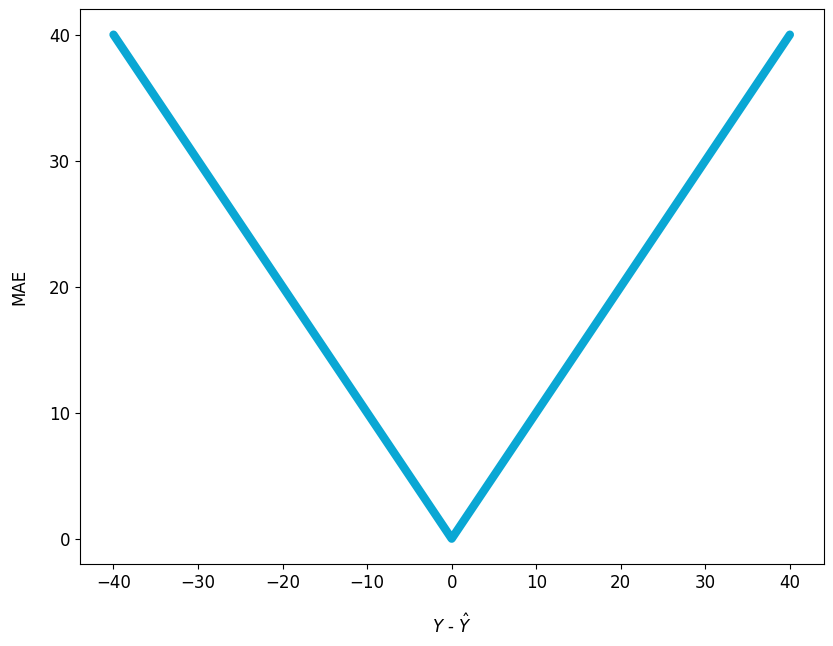

In [148]:
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
ax.plot(diff, mae, c=start_color, linewidth=6, solid_capstyle='round')
ax.set_ylabel('MAE')
ax.set_xlabel('$Y$ - $\hat{Y}$')
ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30, 40])
ax.set_yticks([0, 10, 20, 30, 40])
plt.savefig('plots/MAE_cross_section_2d.png', dpi=300)
plt.show()

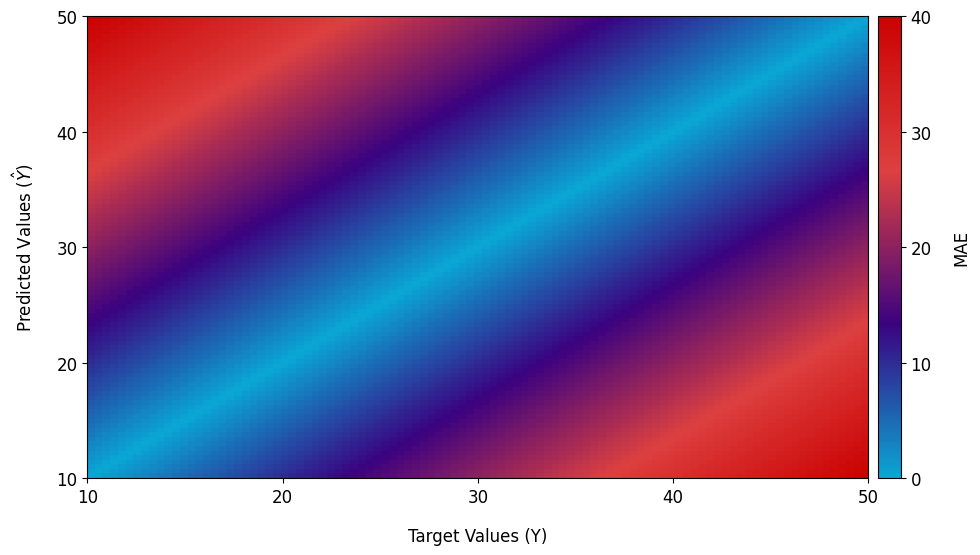

In [149]:
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(mae_grid, origin='lower', aspect='auto', extent=[10, 50, 10, 50], cmap=nml_cmap)
cbar = fig.colorbar(cax, pad=0.01)

cbar.ax.locator_params(nbins=4)
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
cbar.set_label('MAE', labelpad=15)


plt.savefig('plots/MAE_heatmap.png', dpi=300)
plt.show()

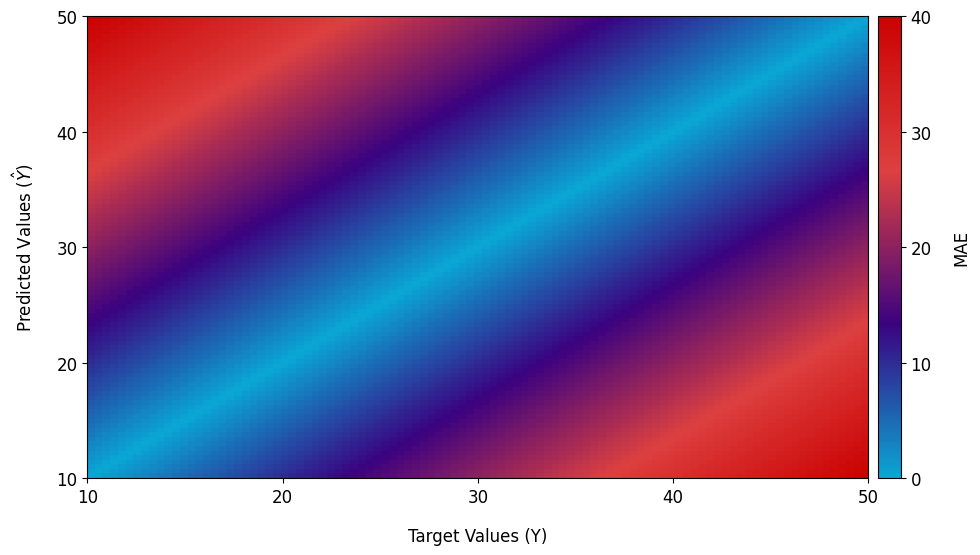

In [150]:
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(mae_grid, origin='lower', aspect='auto', extent=[10, 50, 10, 50], cmap=nml_cmap)
cbar = fig.colorbar(cax, pad=0.01)

cbar.ax.locator_params(nbins=4)
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
cbar.set_label('MAE', labelpad=15)


plt.savefig('plots/MAE_heatmap.png', dpi=300)
plt.show()

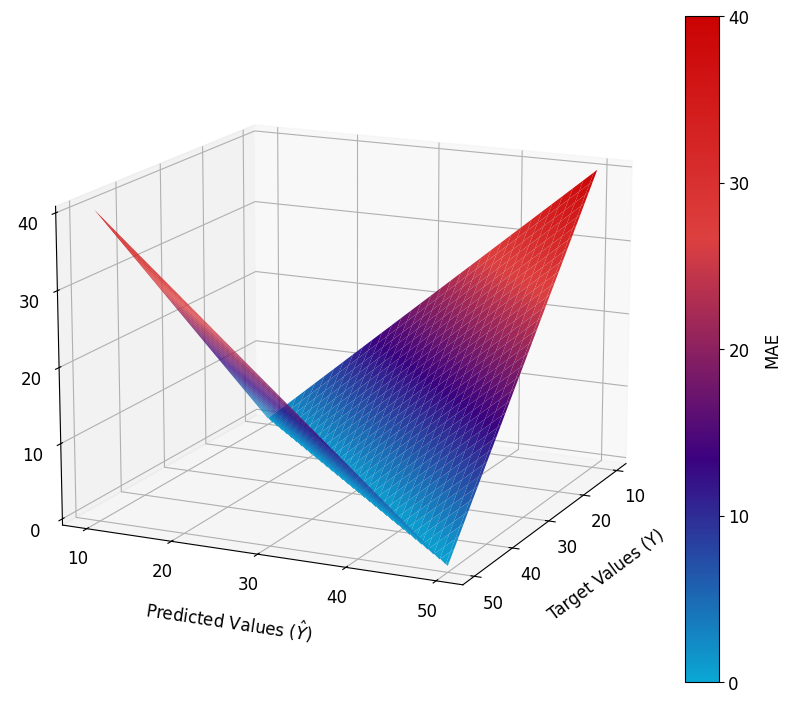

In [151]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(real_grid, predicted_grid, mae_grid, cmap=nml_cmap,
                       vmin=np.min(mae_grid), vmax=np.max(mae_grid))

cbar = fig.colorbar(surf, pad=0.01)
cbar.ax.locator_params(nbins=4)

ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_zticks([0, 10, 20, 30, 40])
ax.view_init(elev=15, azim=25)

ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
ax.set_zlabel('MAE', labelpad=10)
ax.zaxis.label.set_rotation(90)
cbar.set_label('MAE', labelpad=10)

fig.tight_layout()
plt.savefig('plots/MAE_3d_surface.png', dpi=300)
plt.show()


### MAPE

In [152]:
# Calculate MAPE for each pair
mape_grid = np.abs((real_grid - predicted_grid) / real_grid) * 100
mape = np.abs((real_values - predicted_values[::-1]) / real_values) * 100

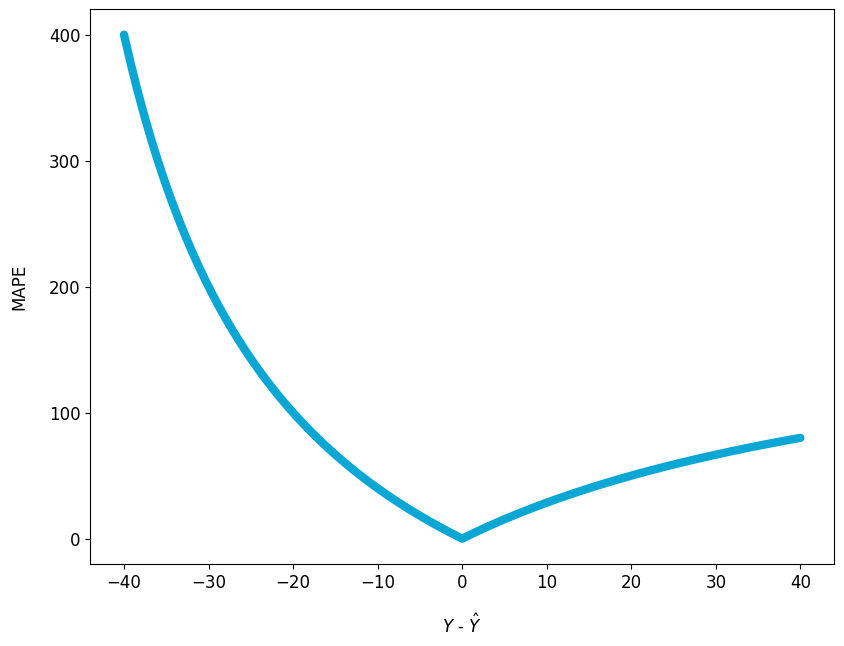

In [153]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
# ax.scatter(diff, mape, c=nml_cmap(mape/mape.max()), edgecolor='none')
ax.plot(diff, mape, c=start_color, linewidth=6, solid_capstyle='round')
ax.set_ylabel('MAPE')
ax.set_xlabel('$Y$ - $\hat{Y}$')
ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30, 40])
ax.set_yticks([0, 100, 200, 300, 400])
plt.savefig('plots/MAPE_cross_section.png', dpi=300)
plt.show()

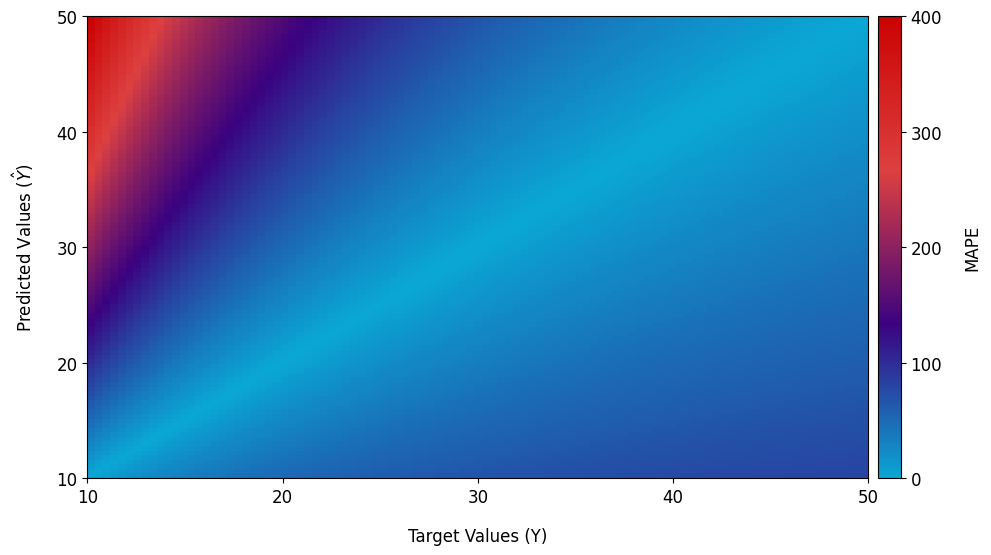

In [154]:
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(mape_grid, origin='lower', aspect='auto', extent=[10, 50, 10, 50], cmap=nml_cmap)
cbar = fig.colorbar(cax, pad=0.01)

cbar.ax.locator_params(nbins=4)
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
cbar.set_label('MAPE', labelpad=15)


plt.savefig('plots/MAPE_heatmap.png', dpi=300)
plt.show()

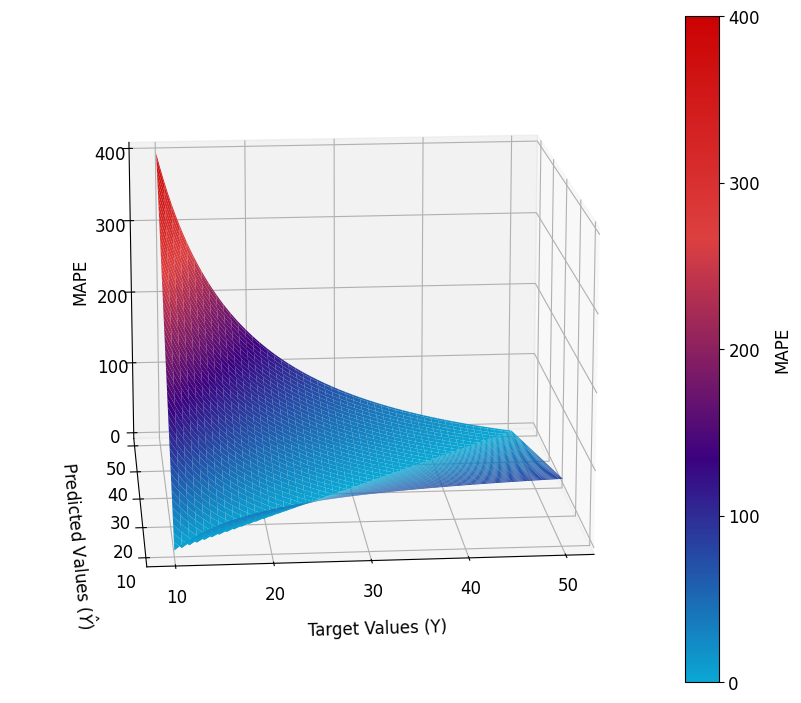

In [21]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(real_grid, predicted_grid, mape_grid, cmap=nml_cmap,
                       vmin=np.min(mape_grid), vmax=np.max(mape_grid))

cbar = fig.colorbar(surf, pad=0.01)
cbar.ax.locator_params(nbins=4)

ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_zticks([0, 100, 200, 300, 400])
ax.view_init(elev=15, azim=265)

ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
ax.set_zlabel('MAPE', labelpad=10)
ax.zaxis.label.set_rotation(90)
cbar.set_label('MAPE', labelpad=10)

fig.tight_layout()
plt.savefig('plots/MAPE_3d_surface_2.png', dpi=300)
plt.show()
